# Diabetes 

https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Data Dictionary
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)






### Machine Learning models used:

- kNN 

- Decision Tree

- Random Forest 


In [1]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Import main libraries
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualisation
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls  
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


# Machine Learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Metric
from sklearn import metrics   

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier





In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [3]:
# Check features info such as non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the features are numerical and they have the same number of records which means that there are no missing values!

In [4]:
# Plot all the features to analyse their distributions

# Define number of rows
figure_row = 4

# Define number of columns
figure_column = 2 

# Starts at column 0 for the loop
flag = 0

# Create a variable in order to store the subplots
fig = tls.make_subplots(rows=figure_row, # number of rows chosen for the subplot
                        cols=figure_column, # number of columns chosen for the subplot
                        subplot_titles=('Pregnancies','Insulin', # Set title names
                                        'Glucose', 'BMI','BloodPressure',
                                        'DiabetesPedigreeFunction',
                                        'SkinThickness','Age'
                                       )
                       )


# Loop through the column starting at positon 1 use the figure_column variable and add 1 in order get the last position
for column in range(1,figure_column+1):
    for row in range(1,figure_row+1): # Another for loop the same idea
        trace = go.Histogram(x=df[df.columns[flag]].values.tolist(), # Plot based in the current position starting at column 0
                             histnorm='probability', # Use probability plot
                             name=df.columns[flag] # Get the name of the features
                            )
# End with all variables together (Histogram + row and column positions)        
        fig.append_trace(trace, row, column)

# Same idea + 1 in order to get the last one
        flag = flag+1

# Display      
py.iplot(fig)

/Users/giulianosilva/opt/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [5]:
# Check descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Clearly looking at the stats metrics there are zero values for:

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Zero values can affect the model's perfomance!

It also can be seen that the standard deviation of Insulin is to high as compared to the other.

In [6]:
# Replace the zero values found to NaN values! 
df[['Glucose','BloodPressure',
    'SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure',
                                            'SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Check how many missing values after using replace method
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Implement an imputation method of the missing values by using the mean of each feature

# Glucose
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)

# Blood Pressure
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)

# Skin Thickness
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace=True)

# Insulin
df['Insulin'].fillna(df['Insulin'].mean(),inplace=True)

# BMI
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

In [8]:
# Check for missing values after the imputation method
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Breakdown of the Outcome variable
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

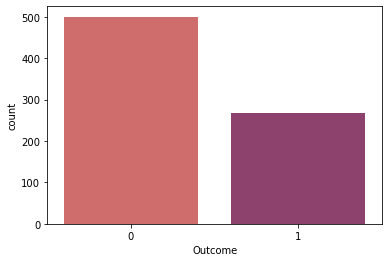

In [10]:
# Check if the number of class in the Outcome feature whether is balanced or not through Bar plot
sns.countplot(data=df, # Dataframe
              x='Outcome', # Outcome variable in the x-axis
              palette = "flare" # Set color palette
             );

Outcome data is unbalanced which may not contribute to an accurate prediction.

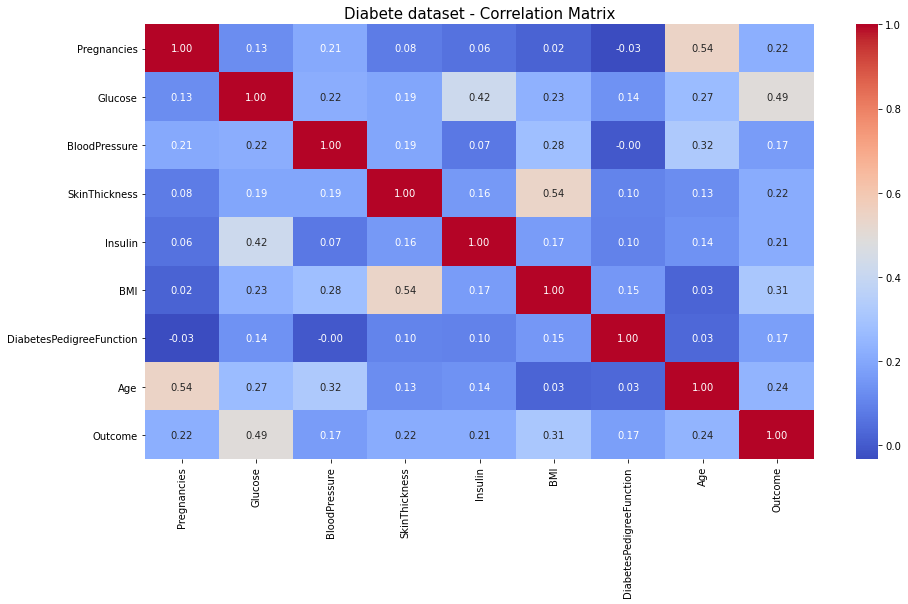

In [11]:
# Correlation matrix graph of the data set

'''
ax targets a subplot within a grid.

If you have nrows=2 and ncols=2, for example, then ax allows you to plot on a specific axis by passing ax=axes[0,0] 
(top left) or ax=axes[1,1] (bottom right), etc.

When you create the subplots, you receive an axes variable. You can later plot (or subplot) with an element of 
that axes variable as above.

ax is an array of axes objects.

Then, creating each plot, you should specify in which axes this plot is to be created.
'''

# Set figure size
f, ax = plt.subplots(figsize= [15,8])

# Correlation matrix with 2 decimal points
sns.heatmap(
    df.corr(), # Peason Correlation of the features
    annot=True, # If True, write the data value in each cell
    fmt=".2f", # 2 decimals point
    ax=ax, # Defined above in order to create the subplots
    cmap = 'coolwarm' # Color scale
)

# Set title and font size
ax.set_title("Diabete dataset - Correlation Matrix", fontsize=15)

# Show figure
plt.show()

It seems that Glucose has a moderate positive correlation to Outcome. The correlation matrix also shows that Pregnancies and Age have a moderate positive correlation.

# Check for anomalies

In [12]:


# Create subplot
fig = make_subplots(rows=4, # number of rows
                    cols=2, # number of columns
                    subplot_titles=('Pregnancies',  # Set titles for the subplots
                                    'Glucose',
                                    'BloodPressure',
                                    'SkinThickness', 
                                    'Insulin', 
                                    'BMI',
                                    'DiabetesPedigreeFunction',
                                    'Age', 
                                    'Outcome')
                   )

# Use add trace in order to add the specic graphic in the given row and colums
fig.add_trace(
    go.Box(x = df['Pregnancies']),
    row=1, col=1,
)

fig.add_trace(
    go.Box(x = df['Glucose']),
    row=2, col=1
)

fig.add_trace(
    go.Box(x = df['BloodPressure']),
    row=3, col=1
)

fig.add_trace(
    go.Box(x = df['SkinThickness']),
    row=4, col=1
)

fig.add_trace(
    go.Box(x = df['Insulin']),
    row=1, col=2
)

fig.add_trace(
    go.Box(x = df['BMI']),
    row=2, col=2
)


fig.add_trace(
    go.Box(x = df['DiabetesPedigreeFunction']),
    row=3, col=2
)

fig.add_trace(
    go.Box(x = df['Age']),
    row=4, col=2
)


# Use update_layout in order to define few configuration such as figure height and width, title, etc
fig.update_layout(
    height=600, # Figure height
    width=900, # Figure width
    title={
        'text': 'Outlier Detection', # Subplot main title
        'y':0.95, # Set main title y-axis position
        'x':0.5, # Set main title x-axis position
        'xanchor': 'center', # xachor position
        'yanchor': 'top'}, # yachpr
    showlegend=False) # legend false


# Display the figure
fig.show()

# Outlier Dectection 

## Wikipedia Definition of IQR

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [13]:
#Q1 = df.quantile(0.25)Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

As noticed earlier, the variable Insulin has a higher standard deviation. However, instead of eliminating the outlier I am going to standardize the data in order to achieve a lower variance within the features. 

In [35]:
# IQR Score 
# IQR score to filter out the outliers by keeping only valid values.

#df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print df with the outliers removed
#print(df_out.shape)

# Print the original dataframe
#print(df.shape)

# Data Preprocessing / Feature Scaling

In [36]:
# Defining X and y (Independent variables and dependent variable)
y = df["Outcome"] # Outcome is the dependent variablee
X = df.drop(["Outcome"], axis = 1) # Drop the Outcome variable and keep all the others
 
# Create a variable the columns name
cols = X.columns

# Create a variable the indexes
index = X.index

# Display first five observations
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [37]:
# Create a variable to store the Standard Scaler 
Scaler = StandardScaler()

# Tranform the independent variable 
StandardizedData = Scaler.fit_transform(X)

# Print the result of the standardization
print(StandardizedData)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [38]:
# Overwrite the new data standardize instead of the original valuer do the independent variables
X = StandardizedData

# KNN Classifier

- Starting with k = 4

In [39]:
# Create a variable to store the kNN Classifier
clf = KNeighborsClassifier(n_neighbors=4) # k = 4 as a starter

In [40]:
# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(
    X, # Independent variables
    y, # Dependent variable
    test_size = 0.25, # 25 split
    random_state = 0) # Set random state 

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 8), (768,), (576, 8), (192, 8), (576,), (192,))

In [41]:
# Train the model on X and y train data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
# Print predictions based on the test data
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [43]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(clf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.80
Test set accuracy: 0.78


## Searching for the optimal k by plotting training and test accuracy

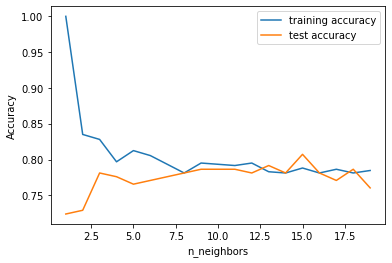

In [44]:

# Create two lists in order to store training and testing accuracy
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

# Use a loop in order to go through each number from 1 to 20
for n_neighbors in neighbors_settings:

# Build the model based on the numbers of the range 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
# Train the model on the given k
    clf.fit(X_train, y_train)

# Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

# Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
# Plot the line for the training accuracy in order to identify the optimal k
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")

# Plot the line for the testing accuracy in order to identify the optimal k
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

# Set ylabel as Accuracy
plt.ylabel("Accuracy")

# Set xlabel as the number of neighbors
plt.xlabel("n_neighbors")

# Set the legend
plt.legend()

# Store the results into a dictionary
res_dfTrain = {}
res_dfTest = {}

It seems that the optimal number is between 7 and 8.

## kNN Classifier

- Set k = 8

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       130
           1       0.75      0.48      0.59        62

    accuracy                           0.78       192
   macro avg       0.77      0.70      0.72       192
weighted avg       0.78      0.78      0.77       192



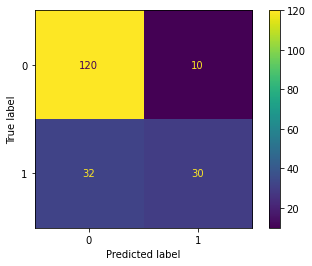

In [45]:
# Based on the plot above the optimal number for k is 8. 
model = KNeighborsClassifier(n_neighbors = 8)

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Display the classification report
print(classification_report(y_test,y_pred))

# Display the confusion matrix 
plot_confusion_matrix(model,X_test,y_test);

In [46]:
# Predict the results
y_pred = model.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test,y_pred)

array([[120,  10],
       [ 32,  30]])

In [47]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(model.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(model.score(X_test, y_test)))

Train set accuracy: 0.78
Test set accuracy: 0.78


Both train and test set are perfoming well!

## Another way using GridSearchCV

In [48]:
# Create dictionary variables

# For train scores
res_dfTrain = {}

# For test scores
res_dfTest = {}

# Create a variable to store the instructions and act as a pipeline
GS = {
    "n_neighbors": np.arange(1,20), # number of neighbours from 1 to 20
    'weights': ['distance', 'uniform'], # Weights measure distance and uniform
    'p':np.arange(1,5), # p arrange from 1 to 5
    "algorithm": ['ball_tree', 'kd_tree', 'auto'] 
}

# Create kNN Classifier model
knn = KNeighborsClassifier()

# Apply GridSearchCV using the variables creates earlier and defining cv = 5
knn_GS = GridSearchCV(knn, GS, cv=5)

# Train the model based on the GridSearchCV findings
knn_GS.fit(X_train, y_train)

# Find best score for both Train and Test
res_dfTrain["KNN Train Score"] = knn_GS.best_score_
res_dfTest["KNN Test Score"] = knn_GS.score(X_test, y_test)


# Print best parameters
print("HP: " + str(knn_GS.best_params_))

# Print the train score
print("Train Score: " + str(knn_GS.best_score_))

# Print the test score
print("Test Score: " + str(knn_GS.score(X_test, y_test)))

HP: {'algorithm': 'ball_tree', 'n_neighbors': 18, 'p': 2, 'weights': 'distance'}
Train Score: 0.7569565217391304
Test Score: 0.7864583333333334


As stated above, the optimal number found is 10. Because it shows less signal of overfitting and this code is considering when train score has the best score and not when both results have the optimal performance.

# Decision Tree

- Tree-based model

### Task 1:

- Apply the decision tree algorithm on the provided dataset (diabetes.csv) on Moodle.


## Feature Scaling

In [49]:
# Defining X and y (Independent variables and dependent variable)
y = df["Outcome"] # Outcome is the dependent variablee
X = df.drop(["Outcome"], axis = 1) # Drop the Outcome variable and keep all the others

 
# Create a variable the columns name
cols = X.columns

# Create a variable the indexes
index = X.index

# Display first five observations
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [50]:
# Create a variable to store the Standard Scaler 
Scaler = StandardScaler()

# Tranform the independent variable 
StandardizedData = Scaler.fit_transform(X)

# Print the result of the standardization
print(StandardizedData)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16629174  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85253118 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33283341  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.91074963 -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34311972 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29945588 -0.47378505
  -0.87137393]]


In [51]:
# Overwrite the new data standardize instead of the original valuer do the independent variables
X = StandardizedData

# Decision Tree Classifier

In [52]:
# Create and initialise a DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train the classifier by calling a method 'fit()'
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Predicting the Test set results

In [53]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = dt.predict(X_test)

## Making the Confusion Matrix

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       130
           1       0.67      0.35      0.46        62

    accuracy                           0.73       192
   macro avg       0.71      0.64      0.64       192
weighted avg       0.72      0.73      0.71       192



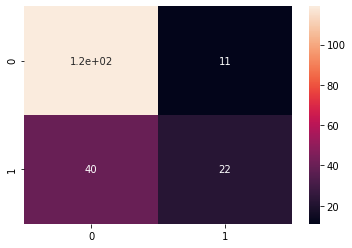

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

## Classification Report

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

TN / True Negative: when a case was negative and predicted negative
TP / True Positive: when a case was positive and predicted positive
FN / False Negative: when a case was positive but predicted negative
FP / False Positive: when a case was negative but predicted positive

## Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

###  Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.


FN – False Negatives


Recall: Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

### F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.


F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### Support - The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset. Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.


- The recall means "how many of this class you find over the whole number of element of this class"

- The precision will be "how many are correctly classified among that class"

- The f1-score is the harmonic mean between precision & recall

- The support is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.

In [55]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(dt.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(dt.score(X_test, y_test)))

Train set accuracy: 0.76
Test set accuracy: 0.73


## Visualising Decision Tree without the features name

[Text(334.8, 380.52, 'X[1] <= 0.75\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(167.4, 271.8, 'X[7] <= -0.403\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(83.7, 163.07999999999998, 'X[5] <= -0.292\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(41.85, 54.360000000000014, 'gini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.324\nsamples = 128\nvalue = [102, 26]'),
 Text(251.10000000000002, 163.07999999999998, 'X[5] <= -0.889\ngini = 0.476\nsamples = 210\nvalue = [128, 82]'),
 Text(209.25, 54.360000000000014, 'gini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(292.95, 54.360000000000014, 'gini = 0.497\nsamples = 175\nvalue = [94, 81]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 1.473\ngini = 0.392\nsamples = 131\nvalue = [35, 96]'),
 Text(418.5, 163.07999999999998, 'X[6] <= -0.424\ngini = 0.477\nsamples = 74\nvalue = [29, 45]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.475\nsamples = 3

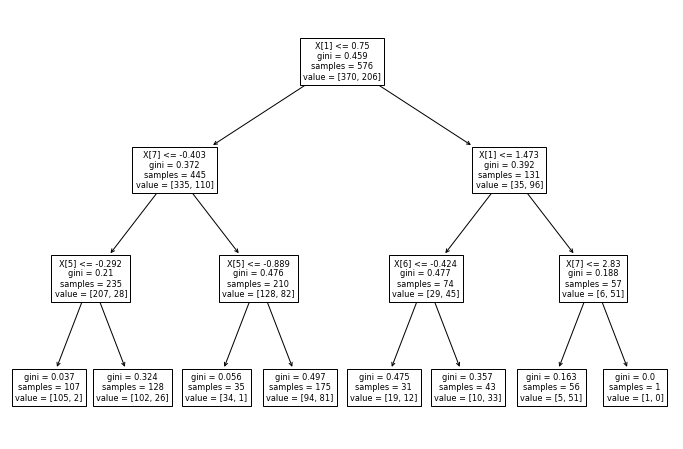

In [56]:
# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt.fit(X_train, y_train)) 

## Visualising Decision Tree with the features name

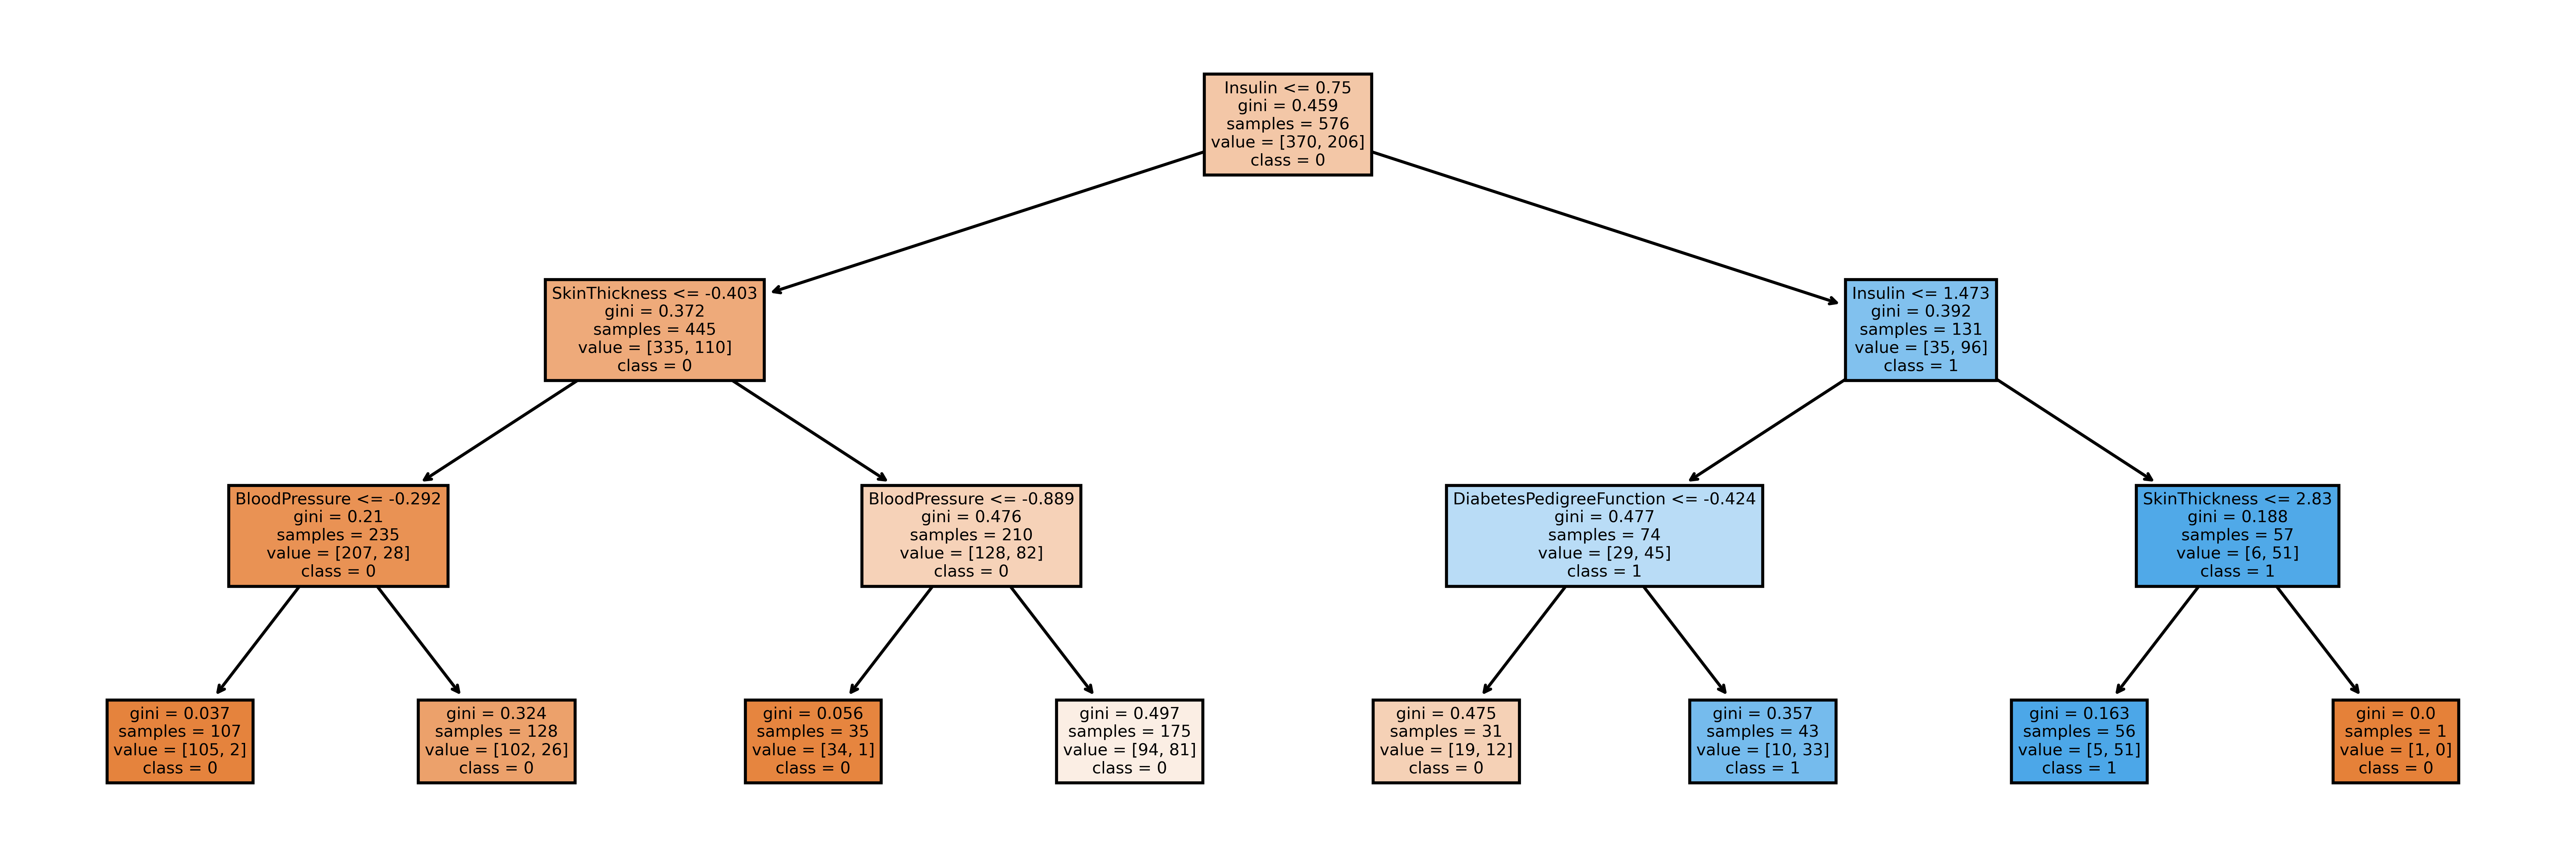

In [57]:
# Column names for dataset
fn=['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']

# Classes of the Output variable
cn=['0','1']

# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=600)

# Plot tree using tree library
tree.plot_tree(dt, # Decision Tree model
           feature_names = fn, # Feature names define above
           class_names=cn, # Classes defined above
           filled = True); 

# Random Forest Classifier model

- Ensemble Classfier

## Task 2
- Apply RandomForest Classifier method for the feature selection for the dataset (car_evaluation.csv) provided on Moodle.

In [58]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

In [59]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.78


The model clearly is showing signal of overfitting because the difference between train and test accuracy is too high. In order to find the optimal parameters, the best solution is using GridSearchCV in order to find the best parameters.

## Hyperparemeter tuning for Random Forest model

## 1st attempt

In [60]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [61]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters searched
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [63]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = 100,
                            min_samples_leaf=3,
                            min_samples_split=10,
                            max_features= 3)
                            
                         

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 0.93
Test set accuracy: 0.78


The model is still showing signals of overfitting!

## 2nd attempt

In [64]:
# Create 4 variables to store the possible values for each parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


# By creating hyperF variable all the values that were given above will 
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


# Appying GridSearchCV 
gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

# Train the data on the hyperparameters in order to find the optimal ones
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [65]:
# Show the best parameters searched
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 100}

## Random Forest model with the best paremeters found

In [66]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100,
                            max_depth = 15,
                            min_samples_leaf=10,
                            min_samples_split=15)
                            
                         

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 0.84
Test set accuracy: 0.78


It seems a resonable accuracy for both sets. The difference between training and testing set is lower when compared to the first attempt. For instance, I will keep this model.

## Feature Importance

In [67]:
# Feature importances
rf.feature_importances_

array([0.05668079, 0.35478916, 0.0421667 , 0.04402889, 0.06951841,
       0.18481155, 0.09041749, 0.15758701])

In [68]:
# Load the dataset 
imp = pd.read_csv('diabetes.csv')

# Drop the dependent variable
imp = imp.drop(["Outcome"], axis = 1) # Drop the Outcome variable and keep all the others

# Transform feature importance into a dataframe
df_importances = pd.DataFrame(rf.feature_importances_, index = imp.columns)

# Display feature importances
df_importances.reset_index(inplace=True)

# Display features importance
df_importances

,index,0
0,Pregnancies,0.056681
1,Glucose,0.354789
2,BloodPressure,0.042167
3,SkinThickness,0.044029
4,Insulin,0.069518
5,BMI,0.184812
6,DiabetesPedigreeFunction,0.090417
7,Age,0.157587


In [69]:
# Show column names
df_importances.columns

Index(['index', 0], dtype='object')

In [70]:
# Rename columns
df_importances = df_importances.rename(columns={'index': 'Features', 0 : 'Importance'})

# Display the changes
df_importances

,Features,Importance
0,Pregnancies,0.056681
1,Glucose,0.354789
2,BloodPressure,0.042167
3,SkinThickness,0.044029
4,Insulin,0.069518
5,BMI,0.184812
6,DiabetesPedigreeFunction,0.090417
7,Age,0.157587


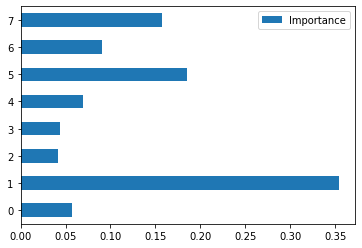

In [71]:
# Visualising Feature Importance
df_importances.plot(kind='barh');

In [72]:
# Create figure in order to store the b
fig = px.bar(df_importances, # Use the filtered dataframe
             color = 'Features'
            )

# Update Layout
fig.update_layout(xaxis={'categoryorder':'total descending'}, # Set in descending order
                  title_text = 'Feature Importance of the Random Forest Classifier Model', # Set title 
                  title_x = 0.5 # Set title alignment
                 
                 )


# Display the figure create
fig.show()

All the models performed very well. However, the target variable has unbalanced data. In order to avoid biases, techniques that deal with unbalanced classes in a classification tasks should be applied.